# MapReduce Affinity Propagation Clustering

https://developer.ibm.com/clouddataservices/2016/07/15/intro-to-apache-spark-graphframes/

In [1]:
import numpy as np

Premier jeu de données utilisé : Iris (comme dans l'article de Wu, Hung et Chu)

Il faut d'abord indexer les données et supprimer les labels

In [2]:
def index_dataset(in_filename, out_filename, sep = ','):   
    with open(out_filename, 'w') as output_file:
        with open(in_filename, 'r') as input_file :
            for i,line in enumerate(input_file) :
                without_label = line.split(',')[:-1]
                output_line = str(i) +',' + ','.join(without_label) + '\n'
                output_file.write(output_line)
        

In [3]:
index_dataset("iris_data.txt", "iris_data_indexed.txt", sep = ',')

Etape 1 : découper le jeu de donner et les répartir entre les différents mappers

In [4]:
rdd = sc.textFile("iris_data_indexed.txt")

In [5]:
rdd.getNumPartitions()

2

In [6]:
res = rdd.collect()

In [7]:
res[:2]

[u'0,5.1,3.5,1.4,0.2', u'1,4.9,3.0,1.4,0.2']

Calcul des similarités

In [8]:
def euclidean_similarity(vector1,vector2):
    sim = [(a - b)**2 for a, b in zip(vector1, vector2)]
    sim = -sum(sim)
    return(sim)

In [9]:
a = [3,3,9]
b= [4,4, 8]
c = [6,3,1]

euclidean_similarity(a,b)


-3

Parser

In [14]:
def parseLine(line, sep) :
    parsed_line = line.split(sep)
    parsed_line =  [float(_) for _ in parsed_line]
    return(parsed_line)

In [15]:
rdd = rdd.map(lambda line : parseLine(line, ','))

In [16]:
rdd.glom().collect()

[[[0.0, 5.1, 3.5, 1.4, 0.2],
  [1.0, 4.9, 3.0, 1.4, 0.2],
  [2.0, 4.7, 3.2, 1.3, 0.2],
  [3.0, 4.6, 3.1, 1.5, 0.2],
  [4.0, 5.0, 3.6, 1.4, 0.2],
  [5.0, 5.4, 3.9, 1.7, 0.4],
  [6.0, 4.6, 3.4, 1.4, 0.3],
  [7.0, 5.0, 3.4, 1.5, 0.2],
  [8.0, 4.4, 2.9, 1.4, 0.2],
  [9.0, 4.9, 3.1, 1.5, 0.1],
  [10.0, 5.4, 3.7, 1.5, 0.2],
  [11.0, 4.8, 3.4, 1.6, 0.2],
  [12.0, 4.8, 3.0, 1.4, 0.1],
  [13.0, 4.3, 3.0, 1.1, 0.1],
  [14.0, 5.8, 4.0, 1.2, 0.2],
  [15.0, 5.7, 4.4, 1.5, 0.4],
  [16.0, 5.4, 3.9, 1.3, 0.4],
  [17.0, 5.1, 3.5, 1.4, 0.3],
  [18.0, 5.7, 3.8, 1.7, 0.3],
  [19.0, 5.1, 3.8, 1.5, 0.3],
  [20.0, 5.4, 3.4, 1.7, 0.2],
  [21.0, 5.1, 3.7, 1.5, 0.4],
  [22.0, 4.6, 3.6, 1.0, 0.2],
  [23.0, 5.1, 3.3, 1.7, 0.5],
  [24.0, 4.8, 3.4, 1.9, 0.2],
  [25.0, 5.0, 3.0, 1.6, 0.2],
  [26.0, 5.0, 3.4, 1.6, 0.4],
  [27.0, 5.2, 3.5, 1.5, 0.2],
  [28.0, 5.2, 3.4, 1.4, 0.2],
  [29.0, 4.7, 3.2, 1.6, 0.2],
  [30.0, 4.8, 3.1, 1.6, 0.2],
  [31.0, 5.4, 3.4, 1.5, 0.4],
  [32.0, 5.2, 4.1, 1.5, 0.1],
  [33.0, 5.5, 4.2, 1

Etape 2 : Chaque mapper calcule les similarités entre ses propres points de données

In [17]:
from itertools import combinations_with_replacement
def similarity_matrix_per_iterator2(iterator, similarity_function):
    #Store partition in a list and reindex it
    partition = list(iterator)
    nb_elements = len(partition)
    ind = range(nb_elements)
    #Compute similarities
    import numpy as np #Import numpy on the node
    similarity_matrix = np.empty([nb_elements, nb_elements]) #More efficient than np.zeros to initialize
    for item1,item2 in combinations_with_replacement(zip(ind, partition),2) :  #NB : on stocke sim(i,j) pour i <= j, ce qui réduit le nombre de données stockées par rapport à une matrice
        sim = similarity_function(item1[1][1:],item2[1][1:]) #compute similarity
        similarity_matrix[item1[0], item2[0]] = sim
        if item1[0] != item2[0]:
            similarity_matrix[item2[0], item1[0]] = sim
    return(nb_elements, ind, partition, similarity_matrix)

rdd.mapPartitions(lambda iterator : similarity_matrix_per_iterator2(iterator, euclidean_similarity), preservesPartitioning=True).glom().collect()

[[77,
  [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76],
  [[0.0, 5.1, 3.5, 1.4, 0.2],
   [1.0, 4.9, 3.0, 1.4, 0.2],
   [2.0, 4.7, 3.2, 1.3, 0.2],
   [3.0, 4.6, 3.1, 1.5, 0.2],
   [4.0, 5.0, 3.6, 1.4, 0.2],
   [5.0, 5.4, 3.9, 1.7, 0.4],
   [6.0, 4.6, 3.4, 1.4, 0.3],
   [7.0, 5.0, 3.4, 1.5, 0.2],
   [8.0, 4.4, 2.9, 1.4, 0.2],
   [9.0, 4.9, 3.1, 1.5, 0.1],
   [10.0, 5.4, 3.7, 1.5, 0.2],
   [11.0, 4.8, 3.4, 1.6, 0.2],
   [12.0, 4.8, 3.0, 1.4, 0.1],
   [13.0, 4.3, 3.0, 1.1, 0.1],
   [14.0, 5.8, 4.0, 1.2, 0.2],
   [15.0,

Etape 3 : Chaque mapper calcule ses préférences

In [51]:
#Il faudra ajouter un paramètre où on décide quel type de préférence on veut (mediane, minimum ou aléatoire entre les range)


In [18]:
def add_preferences_to_similarity_matrix(similarity_matrix, preference_type ="median"):
    """ Updates the preference value in the similarity matrix, i.e : updates the value of s(k,k)
    Several methods are available depending on the number of clusters expected by the user :
    -'median' : default method. Takes the median of the similarities as the preference value. This method leads to a medium to large number of clusters
    -'minimum' : Takes the minimum of the similarities as the preference value. This method leads to a small number of clusters.
    -'random' : Takes a random number in the preference range mentioned in the article as the preference value. """
    if preference_type == "median":
        preference_value = np.median(similarity_matrix)
    np.fill_diagonal(similarity_matrix, preference_value)

Etape 4 : chaque mapper update ses responsibilities

Update responsibility : 
$$ r(i,k)  = s(i,k) - max_{k' \neq k}\{a(i,k') + s(i,k')\} $$
Update availability when $i \neq k$ : 
$$ a(i,k) = min\{0, r(k,k) + \sum_{i' \neq i, i' \neq k} max\{0, r(i',k)\} \} $$
$$ a(i,k) = min\{0, r(k,k) + \sum_{i'} max\{0, r(i',k)\} - max\{0, r(i,k)\} - max\{0, r(k,k)\}\} $$
Or $r(k,k) - max\{0, r(k,k)\} = 0$ si $r(k,k) > 0$ et   $r(k,k) - max\{0, r(k,k)\} = r(k,k)$ si $r(k,k) \leq 0$
d'où : $r(k,k) - max\{0, r(k,k)\} = min\{0, r(k,k)\}$
$$ a(i,k) = min\{0,min\{0, r(k,k)\} + \sum_{i'} max\{0, r(i',k)\} - max\{0, r(i,k)\} \}\}  $$
Update availability when $i = k$ :
$$ a(k,k) = \sum_{i'} max\{0, r(i',k)\} - max\{0, r(k,k) \}$$

In [19]:
def update_responsibility_and_availability(similarity_matrix, responsibility_matrix, availability_matrix, ind, lambda_damping):
    #1. Update Responsibility
    temp_sum_availability_similarity = np.add(availability_matrix, similarity_matrix) #compute a(i,k) + s(i,k) for all i,k
    argmax_resp = np.argmax(temp_sum_availability_similarity, axis = 1 ) #compute argmax { a(i,k') + s(i,k') } on ALL k' when i is fixed
    max_resp =  temp_sum_availability_similarity[ind,argmax_resp][:,None] #NB : [:,None] converts the row of max values into a column
    #Compute the new r(i,k) when k is not equal to argmax { a(i,k') + s(i,k') }
    temp_responsibility_matrix = np.subtract(similarity_matrix,max_resp) 
    #Compute the new r(i,k) when k is equal to  argmax { a(i,k') + s(i,k') } :
    temp_sum_availability_similarity[ind,argmax_resp] = -np.inf #Set the (i,k)th element to -inf when k is an argmax for row i
    max_resp2 = np.max(temp_sum_availability_similarity, axis = 1) #compute new max for row i (the real max value of the row being set to -inf here)
    temp_responsibility_matrix[ind,argmax_resp] = similarity_matrix[ind,argmax_resp] - max_resp2
    #Damping
    responsibility_matrix = (1 - lambda_damping) * temp_responsibility_matrix + lambda_damping*responsibility_matrix
    #Remove temporary variables
    del temp_sum_availability_similarity
    del temp_responsibility_matrix
    
    #2. Update Availability for i != k
    temp_matrix = np.maximum(0, responsibility_matrix)
    temp_matrix = np.sum(temp_matrix, axis = 0) - temp_matrix #Compute el(i,k) = sum(max(0,r(i',k)) - max(0, r(i,k))
    temp_matrix_diag = temp_matrix.diagonal() #Store the updated a(k,k) values
    temp_matrix = np.minimum(0, responsibility_matrix.diagonal()) + temp_matrix
    temp_matrix = np.minimum(0, temp_matrix)

    #3. Update Availability for i ==k
    np.fill_diagonal(temp_matrix, temp_matrix_diag) #set the diagonal values to the updated a(k,k) values computed above
    
    #Damping
    availability_matrix = (1 - lambda_damping) * temp_matrix + lambda_damping*availability_matrix
    return(responsibility_matrix, availability_matrix)

In [20]:
def center_decision(responsibility_matrix, availability_matrix):
    temp_matrix = responsibility_matrix + availability_matrix
    decision = np.argmax(temp_matrix, axis = 1)
    return(decision)

In [21]:
def affinity_propagation_clustering_per_partition(iterator, similarity_function = euclidean_similarity , preference_type ="median", lambda_damping = 0.5, max_iter = 200, max_unchange_count = 3):
    """
    Terminal conditions : max_iter or unchanged decisions for some number of iterations
    We need to add the terminal condition (2) of the article"""
    #1. Compute similarity matrix
    nb_elements, ind, partition, similarity_matrix = similarity_matrix_per_iterator2(iterator, similarity_function)
    #similarity_matrix = convert_sim_to_numpy(nb_elements, similarity_matrix)
    #2. Compute preferences
    add_preferences_to_similarity_matrix(similarity_matrix, preference_type)
    #3. Initialize
    responsibility_matrix = np.zeros([nb_elements, nb_elements]) 
    availability_matrix = np.zeros([nb_elements, nb_elements])
    decision = ind
    unchange_count = 0
    #4. Update responsibility and availability until one of the terminal conditions is met
    for it in xrange(max_iter) :
        responsibility_matrix, availability_matrix = update_responsibility_and_availability(similarity_matrix, responsibility_matrix, availability_matrix, ind, lambda_damping)
        temp_decision = center_decision(responsibility_matrix, availability_matrix)
        if np.array_equal(temp_decision, decision) : 
            unchange_count = unchange_count + 1
            if unchange_count >=  max_unchange_count :
                decision = temp_decision
                break
        else: 
            decision = temp_decision
    #5. Aggregate points with the same centers and add the center coordinates (using the initial index)
    decision = sorted(zip(decision, ind), key = lambda x : x[0])
    from itertools import groupby
    output = list()
    for key, group in groupby(decision, lambda x: x[0]):
        output.append((partition[key][0], [partition[j][0] for i,j in group], partition[key][1:]))
    return(output)

In [24]:
rdd.mapPartitions(lambda iterator : affinity_propagation_clustering_per_partition(iterator, similarity_function = euclidean_similarity), preservesPartitioning=True).glom().collect()

[[(2.0,
   [1.0,
    2.0,
    3.0,
    6.0,
    7.0,
    8.0,
    9.0,
    11.0,
    12.0,
    13.0,
    22.0,
    24.0,
    25.0,
    29.0,
    30.0,
    34.0,
    35.0,
    37.0,
    38.0,
    41.0,
    42.0,
    45.0,
    47.0,
    49.0],
   [4.7, 3.2, 1.3, 0.2]),
  (48.0,
   [0.0,
    4.0,
    5.0,
    10.0,
    14.0,
    15.0,
    16.0,
    17.0,
    18.0,
    19.0,
    20.0,
    21.0,
    23.0,
    26.0,
    27.0,
    28.0,
    31.0,
    32.0,
    33.0,
    36.0,
    39.0,
    40.0,
    43.0,
    44.0,
    46.0,
    48.0],
   [5.3, 3.7, 1.5, 0.2]),
  (58.0,
   [50.0, 51.0, 52.0, 54.0, 58.0, 65.0, 74.0, 75.0, 76.0],
   [6.6, 2.9, 4.6, 1.3]),
  (63.0,
   [55.0, 56.0, 61.0, 63.0, 66.0, 68.0, 70.0, 72.0, 73.0],
   [6.1, 2.9, 4.7, 1.4]),
  (69.0,
   [53.0, 57.0, 59.0, 60.0, 62.0, 64.0, 67.0, 69.0, 71.0],
   [5.6, 2.5, 3.9, 1.1])],
 [(81.0, [79.0, 80.0, 81.0, 93.0, 98.0], [5.5, 2.4, 3.7, 1.0]),
  (83.0,
   [83.0,
    101.0,
    113.0,
    114.0,
    119.0,
    121.0,
    123.0,
    126

Etape 5 : Compute distance between centers

In [22]:
rdd2 = rdd.mapPartitions(lambda iterator : affinity_propagation_clustering_per_partition(iterator, similarity_function = euclidean_similarity), preservesPartitioning=True)

In [23]:
rdd2.cartesian(rdd2).filter(lambda u : u[0][0] < u[1][0]).map(lambda u : ((u[0][0], u[1][0]),euclidean_similarity(u[0][2], u[1][2]))).collect()

[((2.0, 48.0), -0.6499999999999997),
 ((2.0, 58.0), -15.799999999999997),
 ((2.0, 63.0), -15.05),
 ((2.0, 69.0), -8.869999999999997),
 ((48.0, 58.0), -13.149999999999999),
 ((48.0, 63.0), -12.960000000000003),
 ((48.0, 69.0), -8.1),
 ((58.0, 63.0), -0.2700000000000001),
 ((58.0, 69.0), -1.6899999999999995),
 ((63.0, 69.0), -1.1400000000000001),
 ((2.0, 81.0), -7.6800000000000015),
 ((2.0, 83.0), -18.339999999999996),
 ((2.0, 91.0), -14.329999999999997),
 ((2.0, 94.0), -10.680000000000001),
 ((2.0, 105.0), -40.15),
 ((2.0, 130.0), -33.38),
 ((2.0, 140.0), -27.34),
 ((2.0, 147.0), -21.730000000000004),
 ((48.0, 81.0), -7.210000000000001),
 ((58.0, 81.0), -2.359999999999998),
 ((48.0, 83.0), -16.409999999999997),
 ((48.0, 91.0), -12.179999999999998),
 ((58.0, 83.0), -0.7399999999999995),
 ((58.0, 91.0), -0.26999999999999996),
 ((48.0, 94.0), -9.590000000000002),
 ((48.0, 105.0), -35.39999999999999),
 ((48.0, 130.0), -29.27),
 ((48.0, 140.0), -23.97),
 ((58.0, 94.0), -1.1999999999999993),


In [57]:
rdd_dist = rdd2.cartesian(rdd2).map(lambda u : ((u[0][0], u[1][0]),euclidean_similarity(u[0][2], u[1][2])))

In [58]:
threshold=  -2
rdd_dist.filter(lambda u : u[1] > threshold).collect()

[((2.0, 2.0), -0.0),
 ((2.0, 48.0), -0.6499999999999997),
 ((48.0, 2.0), -0.6499999999999997),
 ((48.0, 48.0), -0.0),
 ((58.0, 58.0), -0.0),
 ((58.0, 63.0), -0.2700000000000001),
 ((58.0, 69.0), -1.6899999999999995),
 ((63.0, 58.0), -0.2700000000000001),
 ((69.0, 58.0), -1.6899999999999995),
 ((63.0, 63.0), -0.0),
 ((63.0, 69.0), -1.1400000000000001),
 ((69.0, 63.0), -1.1400000000000001),
 ((69.0, 69.0), -0.0),
 ((58.0, 83.0), -0.7399999999999995),
 ((58.0, 91.0), -0.26999999999999996),
 ((58.0, 94.0), -1.1999999999999993),
 ((58.0, 147.0), -0.8700000000000006),
 ((63.0, 81.0), -1.7699999999999996),
 ((69.0, 81.0), -0.06999999999999987),
 ((63.0, 83.0), -0.24999999999999947),
 ((63.0, 91.0), -0.020000000000000122),
 ((69.0, 83.0), -1.8899999999999997),
 ((69.0, 91.0), -1.0799999999999994),
 ((63.0, 94.0), -0.5499999999999999),
 ((69.0, 94.0), -0.1700000000000002),
 ((63.0, 147.0), -0.7800000000000004),
 ((81.0, 63.0), -1.7699999999999996),
 ((81.0, 69.0), -0.06999999999999987),
 ((83.0

In [41]:
[1, 2] + [4,6]

[1, 2, 4, 6]

In [59]:
edges = rdd_dist.filter(lambda u : u[1] > threshold).map(lambda u: u[0])
edges = edges.map(lambda nameTuple: (nameTuple[0], [ nameTuple[1] ])) \
.reduceByKey(lambda a, b: a + b)  # combine lists: ([1,2,3] + [4,5]) becomes [1,2,3,4,5]
edges.collect()

[(48.0, [2.0, 48.0]),
 (140.0, [83.0, 105.0, 130.0, 140.0, 147.0]),
 (81.0, [63.0, 69.0, 81.0, 91.0, 94.0]),
 (69.0, [58.0, 63.0, 69.0, 81.0, 83.0, 91.0, 94.0]),
 (105.0, [105.0, 130.0, 140.0]),
 (2.0, [2.0, 48.0]),
 (58.0, [58.0, 63.0, 69.0, 83.0, 91.0, 94.0, 147.0]),
 (94.0, [58.0, 63.0, 69.0, 81.0, 83.0, 91.0, 94.0]),
 (130.0, [105.0, 130.0, 140.0, 147.0]),
 (83.0, [58.0, 63.0, 69.0, 83.0, 91.0, 94.0, 140.0, 147.0]),
 (91.0, [58.0, 63.0, 69.0, 81.0, 83.0, 91.0, 94.0, 147.0]),
 (147.0, [58.0, 63.0, 83.0, 91.0, 130.0, 140.0, 147.0]),
 (63.0, [58.0, 63.0, 69.0, 81.0, 83.0, 91.0, 94.0, 147.0])]

In [60]:
dict(edges.collect())

{2.0: [2.0, 48.0],
 48.0: [2.0, 48.0],
 58.0: [58.0, 63.0, 69.0, 83.0, 91.0, 94.0, 147.0],
 63.0: [58.0, 63.0, 69.0, 81.0, 83.0, 91.0, 94.0, 147.0],
 69.0: [58.0, 63.0, 69.0, 81.0, 83.0, 91.0, 94.0],
 81.0: [63.0, 69.0, 81.0, 91.0, 94.0],
 83.0: [58.0, 63.0, 69.0, 83.0, 91.0, 94.0, 140.0, 147.0],
 91.0: [58.0, 63.0, 69.0, 81.0, 83.0, 91.0, 94.0, 147.0],
 94.0: [58.0, 63.0, 69.0, 81.0, 83.0, 91.0, 94.0],
 105.0: [105.0, 130.0, 140.0],
 130.0: [105.0, 130.0, 140.0, 147.0],
 140.0: [83.0, 105.0, 130.0, 140.0, 147.0],
 147.0: [58.0, 63.0, 83.0, 91.0, 130.0, 140.0, 147.0]}

From http://stackoverflow.com/questions/10301000/python-connected-components :

In [29]:
def getRoots(aNeigh):
    def findRoot(aNode,aRoot):
        while aNode != aRoot[aNode][0]:
            aNode = aRoot[aNode][0]
        return (aNode,aRoot[aNode][1])
    myRoot = {} 
    for myNode in aNeigh.keys():
        myRoot[myNode] = (myNode,0)  
    for myI in aNeigh: 
        for myJ in aNeigh[myI]: 
            (myRoot_myI,myDepthMyI) = findRoot(myI,myRoot) 
            (myRoot_myJ,myDepthMyJ) = findRoot(myJ,myRoot) 
            if myRoot_myI != myRoot_myJ: 
                myMin = myRoot_myI
                myMax = myRoot_myJ 
                if  myDepthMyI > myDepthMyJ: 
                    myMin = myRoot_myJ
                    myMax = myRoot_myI
                myRoot[myMax] = (myMax,max(myRoot[myMin][1]+1,myRoot[myMax][1]))
                myRoot[myMin] = (myRoot[myMax][0],-1) 
    myToRet = {}
    for myI in aNeigh: 
        if myRoot[myI][0] == myI:
            myToRet[myI] = []
    for myI in aNeigh: 
        myToRet[findRoot(myI,myRoot)[0]].append(myI) 
    return myToRet  

In [30]:
myGraph = {0: [1,2,3], 1: [], 2: [1], 3: [4,5],4: [3,5], 5: [3,4,7], 6: [8], 7: [],8: [9], 9: []}

In [31]:
print getRoots(myGraph)

{8: [6, 8, 9], 1: [0, 1, 2, 3, 4, 5, 7]}


https://breakingcode.wordpress.com/2013/04/08/finding-connected-components-in-a-graph/

In [51]:
def getRoots2(aNeigh):
    def findRoot(aNode,aRoot):
        while aNode != aRoot[aNode][0]:
            aNode = aRoot[aNode][0]
        return (aNode,aRoot[aNode][1])
    myRoot = {} 
    for myNode in aNeigh.keys():
        myRoot[myNode] = (myNode,0)  
    for myI in aNeigh: 
        for myJ in aNeigh[myI]: 
            (myRoot_myI,myDepthMyI) = findRoot(myI,myRoot) 
            (myRoot_myJ,myDepthMyJ) = findRoot(myJ,myRoot) 
            if myRoot_myI != myRoot_myJ: 
                myMin = myRoot_myI
                myMax = myRoot_myJ 
                if  myDepthMyI > myDepthMyJ: 
                    myMin = myRoot_myJ
                    myMax = myRoot_myI
                myRoot[myMax] = (myMax,max(myRoot[myMin][1]+1,myRoot[myMax][1]))
                myRoot[myMin] = (myRoot[myMax][0],-1) 
    myToRet = []
    for myI in aNeigh: 
        myToRet.append((findRoot(myI,myRoot)[0], myI)) 
    return myToRet  

In [52]:
print getRoots2(myGraph) #we get the same key for each node which are in the same subgraph

[(1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (8, 6), (1, 7), (8, 8), (8, 9)]


In [61]:
getRoots2(dict(edges.collect())) #On obtient 2 centres

[(48.0, 2.0),
 (58.0, 147.0),
 (58.0, 69.0),
 (58.0, 105.0),
 (58.0, 140.0),
 (58.0, 130.0),
 (48.0, 48.0),
 (58.0, 81.0),
 (58.0, 83.0),
 (58.0, 58.0),
 (58.0, 91.0),
 (58.0, 94.0),
 (58.0, 63.0)]

In [66]:
def getRoots3(aNeigh):
    def findRoot(aNode,aRoot):
        while aNode != aRoot[aNode][0]:
            aNode = aRoot[aNode][0]
        return (aNode,aRoot[aNode][1])
    myRoot = {} 
    for myNode in aNeigh.keys():
        myRoot[myNode] = (myNode,0)  
    for myI in aNeigh: 
        for myJ in aNeigh[myI]: 
            (myRoot_myI,myDepthMyI) = findRoot(myI,myRoot) 
            (myRoot_myJ,myDepthMyJ) = findRoot(myJ,myRoot) 
            if myRoot_myI != myRoot_myJ: 
                myMin = myRoot_myI
                myMax = myRoot_myJ 
                if  myDepthMyI > myDepthMyJ: 
                    myMin = myRoot_myJ
                    myMax = myRoot_myI
                myRoot[myMax] = (myMax,max(myRoot[myMin][1]+1,myRoot[myMax][1]))
                myRoot[myMin] = (myRoot[myMax][0],-1) 
    myToRet = {}
    for myI in aNeigh: 
        myToRet[myI] = findRoot(myI,myRoot)[0]
    return myToRet  

In [67]:
print getRoots3(myGraph) 

{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 8, 7: 1, 8: 8, 9: 8}


In [68]:
getRoots3(dict(edges.collect())) #On obtient 2 centres

{2.0: 48.0,
 48.0: 48.0,
 58.0: 58.0,
 63.0: 58.0,
 69.0: 58.0,
 81.0: 58.0,
 83.0: 58.0,
 91.0: 58.0,
 94.0: 58.0,
 105.0: 58.0,
 130.0: 58.0,
 140.0: 58.0,
 147.0: 58.0}

In [69]:
connected_components = getRoots3(dict(edges.collect()))

In [70]:
#Broadcast des résultats de la recherche de connected components sur tous les noeuds
connected_components_broadcast = sc.broadcast(connected_components)

In [72]:
rdd2.map(lambda (center, points, coordinates) : (connected_components_broadcast.value[center], points)).collect()

[(48.0,
  [1.0,
   2.0,
   3.0,
   6.0,
   7.0,
   8.0,
   9.0,
   11.0,
   12.0,
   13.0,
   22.0,
   24.0,
   25.0,
   29.0,
   30.0,
   34.0,
   35.0,
   37.0,
   38.0,
   41.0,
   42.0,
   45.0,
   47.0,
   49.0]),
 (48.0,
  [0.0,
   4.0,
   5.0,
   10.0,
   14.0,
   15.0,
   16.0,
   17.0,
   18.0,
   19.0,
   20.0,
   21.0,
   23.0,
   26.0,
   27.0,
   28.0,
   31.0,
   32.0,
   33.0,
   36.0,
   39.0,
   40.0,
   43.0,
   44.0,
   46.0,
   48.0]),
 (58.0, [50.0, 51.0, 52.0, 54.0, 58.0, 65.0, 74.0, 75.0, 76.0]),
 (58.0, [55.0, 56.0, 61.0, 63.0, 66.0, 68.0, 70.0, 72.0, 73.0]),
 (58.0, [53.0, 57.0, 59.0, 60.0, 62.0, 64.0, 67.0, 69.0, 71.0]),
 (58.0, [79.0, 80.0, 81.0, 93.0, 98.0]),
 (58.0,
  [83.0,
   101.0,
   113.0,
   114.0,
   119.0,
   121.0,
   123.0,
   126.0,
   127.0,
   133.0,
   134.0,
   142.0,
   146.0,
   149.0]),
 (58.0, [78.0, 85.0, 86.0, 87.0, 91.0, 97.0, 138.0]),
 (58.0, [82.0, 84.0, 88.0, 89.0, 90.0, 92.0, 94.0, 95.0, 96.0, 99.0, 106.0]),
 (58.0, [105.0, 117.0, 

In [73]:
rdd3 = rdd2.map(lambda (center, points, coordinates) : (connected_components_broadcast.value[center], points))

In [ ]:
#On aggrège ensuite les listes de points qui ont le même centre

In [75]:
result_clustering = rdd3.reduceByKey(lambda a, b: a + b)

In [76]:
result_clustering.collect()

[(48.0,
  [1.0,
   2.0,
   3.0,
   6.0,
   7.0,
   8.0,
   9.0,
   11.0,
   12.0,
   13.0,
   22.0,
   24.0,
   25.0,
   29.0,
   30.0,
   34.0,
   35.0,
   37.0,
   38.0,
   41.0,
   42.0,
   45.0,
   47.0,
   49.0,
   0.0,
   4.0,
   5.0,
   10.0,
   14.0,
   15.0,
   16.0,
   17.0,
   18.0,
   19.0,
   20.0,
   21.0,
   23.0,
   26.0,
   27.0,
   28.0,
   31.0,
   32.0,
   33.0,
   36.0,
   39.0,
   40.0,
   43.0,
   44.0,
   46.0,
   48.0]),
 (58.0,
  [50.0,
   51.0,
   52.0,
   54.0,
   58.0,
   65.0,
   74.0,
   75.0,
   76.0,
   55.0,
   56.0,
   61.0,
   63.0,
   66.0,
   68.0,
   70.0,
   72.0,
   73.0,
   53.0,
   57.0,
   59.0,
   60.0,
   62.0,
   64.0,
   67.0,
   69.0,
   71.0,
   79.0,
   80.0,
   81.0,
   93.0,
   98.0,
   83.0,
   101.0,
   113.0,
   114.0,
   119.0,
   121.0,
   123.0,
   126.0,
   127.0,
   133.0,
   134.0,
   142.0,
   146.0,
   149.0,
   78.0,
   85.0,
   86.0,
   87.0,
   91.0,
   97.0,
   138.0,
   82.0,
   84.0,
   88.0,
   89.0,
   90.0,
   92.

In [77]:
result_clustering.flatMap(lambda (center, points) : [(point, center) for point in points]).collect()

[(1.0, 48.0),
 (2.0, 48.0),
 (3.0, 48.0),
 (6.0, 48.0),
 (7.0, 48.0),
 (8.0, 48.0),
 (9.0, 48.0),
 (11.0, 48.0),
 (12.0, 48.0),
 (13.0, 48.0),
 (22.0, 48.0),
 (24.0, 48.0),
 (25.0, 48.0),
 (29.0, 48.0),
 (30.0, 48.0),
 (34.0, 48.0),
 (35.0, 48.0),
 (37.0, 48.0),
 (38.0, 48.0),
 (41.0, 48.0),
 (42.0, 48.0),
 (45.0, 48.0),
 (47.0, 48.0),
 (49.0, 48.0),
 (0.0, 48.0),
 (4.0, 48.0),
 (5.0, 48.0),
 (10.0, 48.0),
 (14.0, 48.0),
 (15.0, 48.0),
 (16.0, 48.0),
 (17.0, 48.0),
 (18.0, 48.0),
 (19.0, 48.0),
 (20.0, 48.0),
 (21.0, 48.0),
 (23.0, 48.0),
 (26.0, 48.0),
 (27.0, 48.0),
 (28.0, 48.0),
 (31.0, 48.0),
 (32.0, 48.0),
 (33.0, 48.0),
 (36.0, 48.0),
 (39.0, 48.0),
 (40.0, 48.0),
 (43.0, 48.0),
 (44.0, 48.0),
 (46.0, 48.0),
 (48.0, 48.0),
 (50.0, 58.0),
 (51.0, 58.0),
 (52.0, 58.0),
 (54.0, 58.0),
 (58.0, 58.0),
 (65.0, 58.0),
 (74.0, 58.0),
 (75.0, 58.0),
 (76.0, 58.0),
 (55.0, 58.0),
 (56.0, 58.0),
 (61.0, 58.0),
 (63.0, 58.0),
 (66.0, 58.0),
 (68.0, 58.0),
 (70.0, 58.0),
 (72.0, 58.0),
 (73.

Visualize results

In [78]:
import pandas as pd
df_res = pd.DataFrame(result_clustering.flatMap(lambda (center, points) : [(point, center) for point in points]).collect())

In [79]:
df_res.head()

,0,1
0,1.0,48.0
1,2.0,48.0
2,3.0,48.0
3,6.0,48.0
4,7.0,48.0


In [81]:
df_res.columns=['Index', 'Cluster']
df_res.head()

,Index,Cluster
0,1.0,48.0
1,2.0,48.0
2,3.0,48.0
3,6.0,48.0
4,7.0,48.0


In [86]:
data_df = pd.read_csv("iris_data_indexed.txt", header = None)
data_df.head()

,0,1,2,3,4
0,0,5.1,3.5,1.4,0.2
1,1,4.9,3.0,1.4,0.2
2,2,4.7,3.2,1.3,0.2
3,3,4.6,3.1,1.5,0.2
4,4,5.0,3.6,1.4,0.2


In [88]:
data_df.columns = ["Index", "Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"]
data_df.head()

,Index,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,0,5.1,3.5,1.4,0.2
1,1,4.9,3.0,1.4,0.2
2,2,4.7,3.2,1.3,0.2
3,3,4.6,3.1,1.5,0.2
4,4,5.0,3.6,1.4,0.2


In [99]:
final_df = pd.merge(data_df, df_res, left_on = "Index", right_on = "Index")
final_df.head()

,Index,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Cluster
0,0,5.1,3.5,1.4,0.2,48.0
1,1,4.9,3.0,1.4,0.2,48.0
2,2,4.7,3.2,1.3,0.2,48.0
3,3,4.6,3.1,1.5,0.2,48.0
4,4,5.0,3.6,1.4,0.2,48.0


In [100]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline  

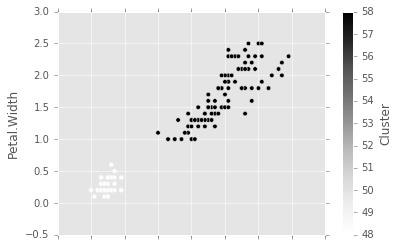

In [105]:
final_df.plot.scatter("Petal.Length", "Petal.Width", c = "Cluster" )

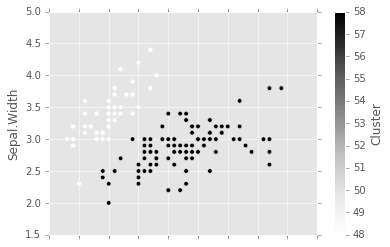

In [106]:
final_df.plot.scatter("Sepal.Length", "Sepal.Width", c = "Cluster" )

http://www.datareply.co.uk/blog/2016/9/20/running-graph-analytics-with-spark-graphframes-a-simple-example

In [39]:
import os
os.environ["PYSPARK_SUBMIT_ARGS"] = (
    "--packages graphframes:graphframes:0.2.0-spark2.0-s_2.11 pyspark-shell"
)

In [2]:
from graphframes.examples import Graphs
g = Graphs(sqlContext).friends()

ImportError: No module named graphframes.examples

In [41]:
e = sqlContext.createDataFrame(edges, ["v1", "v2"])

In [42]:
e.collect()

[Row(v1=2.0, v2=48.0),
 Row(v1=58.0, v2=63.0),
 Row(v1=58.0, v2=69.0),
 Row(v1=63.0, v2=69.0),
 Row(v1=58.0, v2=83.0),
 Row(v1=58.0, v2=91.0),
 Row(v1=58.0, v2=94.0),
 Row(v1=58.0, v2=147.0),
 Row(v1=63.0, v2=81.0),
 Row(v1=69.0, v2=81.0),
 Row(v1=63.0, v2=83.0),
 Row(v1=63.0, v2=91.0),
 Row(v1=69.0, v2=83.0),
 Row(v1=69.0, v2=91.0),
 Row(v1=63.0, v2=94.0),
 Row(v1=69.0, v2=94.0),
 Row(v1=63.0, v2=147.0),
 Row(v1=81.0, v2=91.0),
 Row(v1=81.0, v2=94.0),
 Row(v1=83.0, v2=91.0),
 Row(v1=83.0, v2=94.0),
 Row(v1=83.0, v2=140.0),
 Row(v1=91.0, v2=94.0),
 Row(v1=83.0, v2=147.0),
 Row(v1=91.0, v2=147.0),
 Row(v1=105.0, v2=130.0),
 Row(v1=105.0, v2=140.0),
 Row(v1=130.0, v2=140.0),
 Row(v1=130.0, v2=147.0),
 Row(v1=140.0, v2=147.0)]

In [ ]:
v =

In [26]:
edges2 = sc.parallelize([
        ("a", "b"),
        ("b", "c"),
        ("d", "e"),
        ("d", "f"),
        ("g", "b")
    ])

vertices_to_roots = ccf.ccf_run(sc, edges2, max_iters=5)
root_to_children = ccf.ccf_group_by_root(vertices_to_roots)
root_to_children.collect()

-- remaing steps: 4 found_new_pair: 0


[('e', ['d']), ('c', ['b']), ('b', ['a', 'g']), ('f', ['d'])]

In [130]:
y = sc.parallelize([(0,1), (0,1), (0,2), (1,2), (1,10), (1,20), (3,18), (3,18), (3,18)])
sqlContext.createDataFrame(y, ["id", "score"]).collect()

[Row(id=0, score=1),
 Row(id=0, score=1),
 Row(id=0, score=2),
 Row(id=1, score=2),
 Row(id=1, score=10),
 Row(id=1, score=20),
 Row(id=3, score=18),
 Row(id=3, score=18),
 Row(id=3, score=18)]

In [87]:
y = sc.parallelize([("a", 2), ("a", 3)])
sorted(y.join(y).collect())

[('a', (2, 2)), ('a', (2, 3)), ('a', (3, 2)), ('a', (3, 3))]

In [120]:
y = sc.parallelize([1, 2])
sorted(y.cartesian(y).map(lambda u : (u[0],300)).collect())

[(1, 300), (1, 300), (2, 300), (2, 300)]